In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import tensorflow.keras as keras
from scipy.stats import mode
import matplotlib.pyplot as plt
import seaborn as sns
import os
import cv2
from skimage import io, color, exposure
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.metrics import classification_report, recall_score, f1_score
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from IPython.display import clear_output
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
clear_output()

In [2]:
data = pd.read_csv('/Users/khushishah/Downloads/archive/your_csv_file_updated.csv')
data.head()

,Unnamed: 0.1,Unnamed: 0,image,level
0,0,0,10_left.jpeg,0
1,1,1,10_right.jpeg,0
2,2,2,13_left.jpeg,0
3,3,3,13_right.jpeg,0
4,4,4,15_left.jpeg,1


In [3]:
data.drop(columns=['Unnamed: 0.1','Unnamed: 0'], inplace=True)
data.head()

,image,level
0,10_left.jpeg,0
1,10_right.jpeg,0
2,13_left.jpeg,0
3,13_right.jpeg,0
4,15_left.jpeg,1


level
0    25802
2     5288
1     2438
3      872
4      708
Name: count, dtype: int64

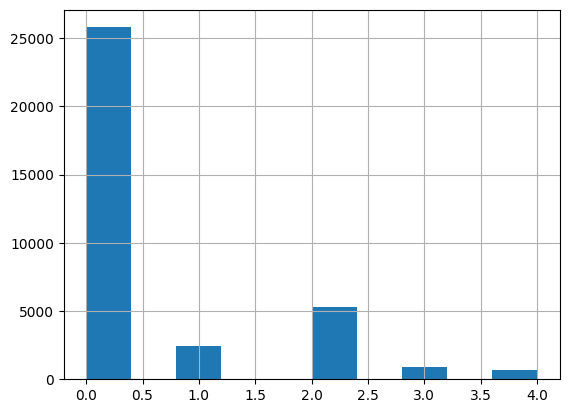

In [4]:
data['level'].hist()
data['level'].value_counts()

In [5]:
#histogram eq
def preprocessing1(img):
    red, green, blue = cv2.split(img)
    hist_red = cv2.equalizeHist(red)
    hist_green = cv2.equalizeHist(green)
    hist_blue = cv2.equalizeHist(blue)
    img_eq = cv2.merge((hist_red, hist_green, hist_blue))
    return img_eq

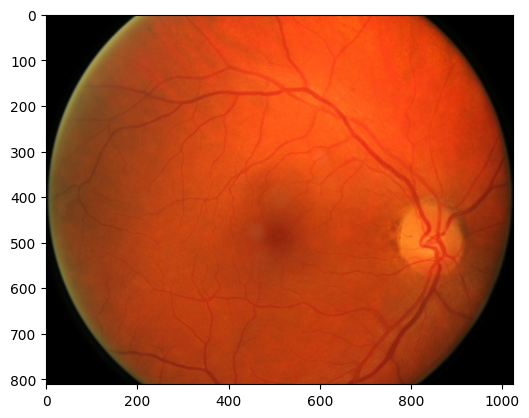

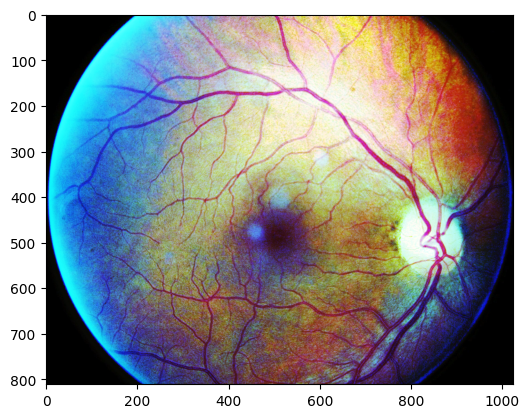

In [6]:
img = cv2.imread('/Users/khushishah/Downloads/archive/resized_train_cropped/resized_train_cropped/3346_left.jpeg')
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
pr1_img = preprocessing1(img)
plt.imshow(img)
plt.show()
plt.imshow(pr1_img)
plt.show()

In [7]:
#gaussian blur
def preprocessing2(img):
    img_ben = cv2.addWeighted(img, 4, cv2.GaussianBlur(img, (0, 0), 10), -4, 128)
    return img_ben

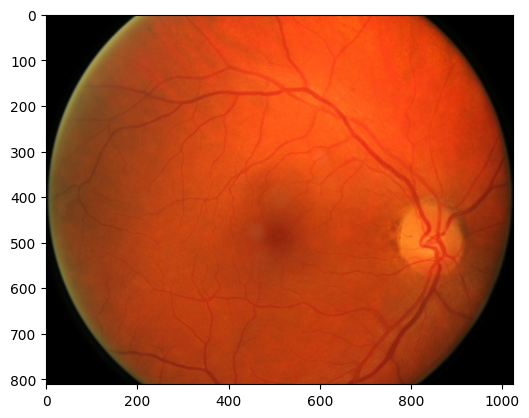

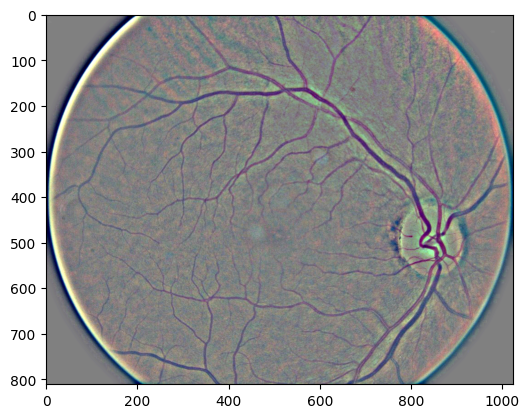

In [8]:
pr2_img = preprocessing2(img)
plt.imshow(img)
plt.show()
plt.imshow(pr2_img)
plt.show()

In [9]:
import cv2
import numpy as np

def preprocessing3(image, kernel_size=30, sigma=19.9, theta = 0, lambda_=9.8, gamma=6.08):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    gabor_kernel = cv2.getGaborKernel(
        (kernel_size, kernel_size), 
        sigma, 
        theta, 
        lambda_, 
        gamma, 
        ktype=cv2.CV_32F
    )

    filtered_image = cv2.filter2D(image, cv2.CV_32F, gabor_kernel)
    filtered_rgb_image = cv2.cvtColor(filtered_image, cv2.COLOR_GRAY2RGB)
#     print(filtered_rgb_image.shape)
    return filtered_rgb_image

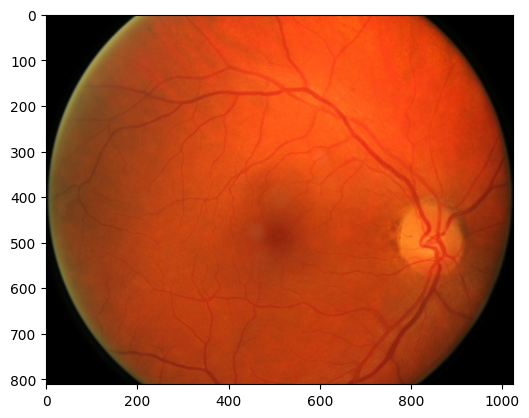

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


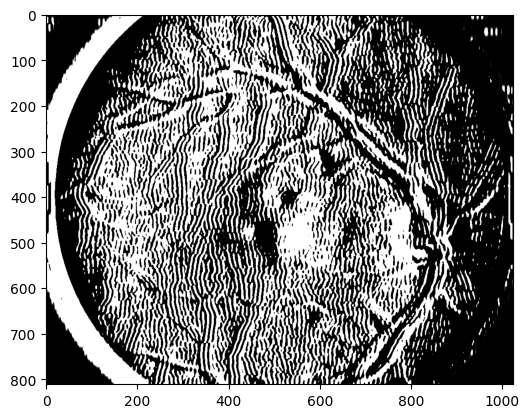

In [10]:
pr1_img = preprocessing3(img)
plt.imshow(img)
plt.show()
plt.imshow(pr1_img)
plt.show()

In [11]:
def preprocessing4(img):
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    
    kernel = np.ones((1000,1000), np.float64)
    background = cv2.morphologyEx(gray, cv2.MORPH_OPEN, kernel)
    
    shading_correction = cv2.subtract(gray, background)
    shading_correction = cv2.cvtColor(shading_correction, cv2.COLOR_GRAY2RGB)
    shading_correction = cv2.resize(shading_correction,(224,224))
    return shading_correction

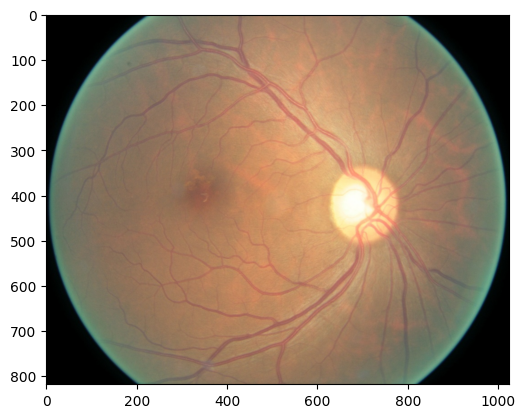

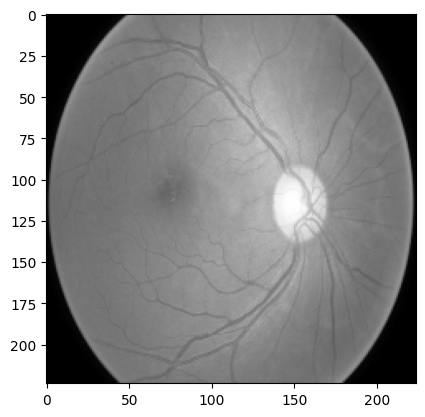

In [12]:
img = cv2.imread('/Users/khushishah/Downloads/archive/resized_train_cropped/resized_train_cropped/10010_left.jpeg')
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
chan= preprocessing4(img)
plt.imshow(img)
plt.show()
plt.imshow(chan)
plt.show()

In [13]:
def preprocessing5(img):
    # Convert BGR to RGB
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    # Resize to (224, 224)
    resized_img = cv2.resize(img_rgb, (224, 224))
    return resized_img

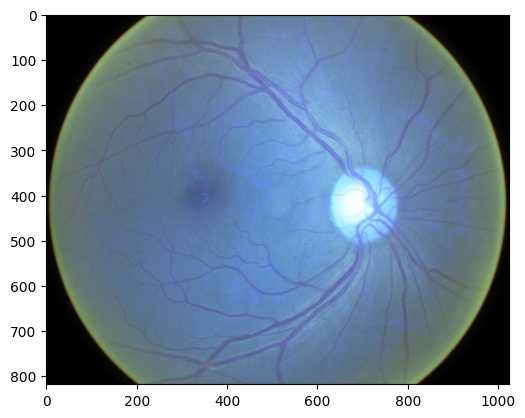

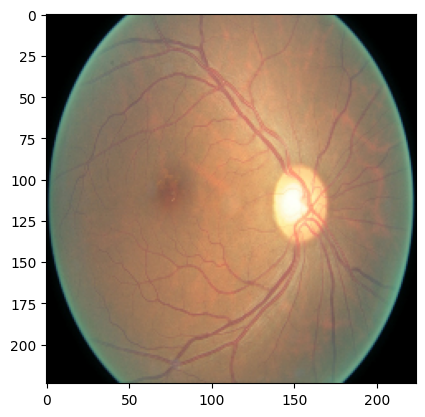

In [14]:
img = cv2.imread('/Users/khushishah/Downloads/archive/resized_train_cropped/resized_train_cropped/10010_left.jpeg')
pr1_img = preprocessing5(img)
plt.imshow(img)
plt.show()
plt.imshow(pr1_img)
plt.show()

In [15]:
print(len(data))

35108


In [16]:
class_distribution = data['level'].value_counts(normalize=True)

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
random_rows = data.sample(n=5000, random_state=42)
print(random_rows)

                  image  level
13810  17340_right.jpeg      0
22083  27852_right.jpeg      0
27552   34901_left.jpeg      4
15987  20070_right.jpeg      0
16171  20273_right.jpeg      0
...                 ...    ...
5946     7506_left.jpeg      0
8124    10184_left.jpeg      0
19771  24957_right.jpeg      2
29628   37524_left.jpeg      0
24695  31226_right.jpeg      2

[5000 rows x 2 columns]


In [19]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout, Flatten
from tensorflow.keras.models import Model
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.utils import resample
from sklearn.metrics import classification_report
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

In [20]:
data = pd.read_csv("/Users/khushishah/Downloads/archive/your_csv_file_updated.csv")
print(data.value_counts().sum())
print(data['level'].unique())
print(data['level'].value_counts().unique())
data.head()

35108
[0 1 2 4 3]
[25802  5288  2438   872   708]


,Unnamed: 0.1,Unnamed: 0,image,level
0,0,0,10_left.jpeg,0
1,1,1,10_right.jpeg,0
2,2,2,13_left.jpeg,0
3,3,3,13_right.jpeg,0
4,4,4,15_left.jpeg,1


In [21]:
data.drop(columns=['Unnamed: 0.1','Unnamed: 0'], inplace=True)
data.head()

,image,level
0,10_left.jpeg,0
1,10_right.jpeg,0
2,13_left.jpeg,0
3,13_right.jpeg,0
4,15_left.jpeg,1


In [22]:
from imblearn.under_sampling import RandomUnderSampler
import numpy as np

# Define your dataset
X = data['image']  # Your feature data
y = data['level']  # Your class labels

# Convert DataFrame or Series to a numpy array
X_array = X.values.reshape(-1, 1)  # Reshape to a 2D array with a single column
y_array = y.values  # No need to reshape

# Count the number of datapoints for each class
class_counts = {0: 25802, 1: 5288, 2: 2438, 3: 708, 4: 872}

# Find the target number of datapoints
target_count = min(class_counts.values())  # Adjust to the minimum count among all classes

# Undersample the majority classes
undersampler = RandomUnderSampler(sampling_strategy={label: target_count for label in class_counts.keys()})
X_resampled, y_resampled = undersampler.fit_resample(X_array, y_array)

# Check the new class counts
unique, counts = np.unique(y_resampled, return_counts=True)
resampled_class_counts = dict(zip(unique, counts))
print("Resampled class counts:", resampled_class_counts)


Resampled class counts: {0: 708, 1: 708, 2: 708, 3: 708, 4: 708}


In [23]:
new_X = []
for i in X_resampled:
  for j in i:
    new_X.append(j)
y_resampled

array([0, 0, 0, ..., 4, 4, 4])

In [24]:
# Create a new dataframe with resampled data
resampled_data = {'image': new_X,
        'level': y_resampled}

balanced_data = pd.DataFrame(resampled_data)

# Display the first few rows of the new dataframe
balanced_data.sample(10)

,image,level
3515,439_right.jpeg,4
1724,42832_left.jpeg,2
727,42473_left.jpeg,1
1800,23023_right.jpeg,2
1330,9467_left.jpeg,1
2491,18126_right.jpeg,3
698,24062_left.jpeg,0
2704,3317_right.jpeg,3
3123,38325_right.jpeg,4
3151,33725_left.jpeg,4


In [25]:
print(balanced_data.value_counts().sum())
print(balanced_data['level'].unique())
print(balanced_data['level'].value_counts().unique())

3540
[0 1 2 3 4]
[708]


In [26]:
#balanced_data['image'] = balanced_data['image']+'.jpeg'
balanced_data.head()

,image,level
0,10634_left.jpeg,0
1,17568_left.jpeg,0
2,733_left.jpeg,0
3,37231_right.jpeg,0
4,9010_right.jpeg,0


In [27]:
train, val = train_test_split(balanced_data, test_size=0.2, random_state=42)

In [28]:
train

,image,level
532,2846_left.jpeg,0
3386,40319_right.jpeg,4
2163,31994_left.jpeg,3
1813,27075_left.jpeg,2
842,27304_left.jpeg,1
...,...,...
1130,3587_right.jpeg,1
1294,3271_right.jpeg,1
860,19472_left.jpeg,1
3507,32149_left.jpeg,4


In [29]:
val

,image,level
712,32614_left.jpeg,1
279,2247_right.jpeg,0
1456,6670_left.jpeg,2
3504,43997_left.jpeg,4
2194,20167_left.jpeg,3
...,...,...
2624,32388_left.jpeg,3
2073,23575_right.jpeg,2
1356,24983_right.jpeg,1
1146,42371_left.jpeg,1


In [30]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
    rescale=1./255.,
    preprocessing_function = preprocessing4
)
val_datagen = ImageDataGenerator(
    rescale=1./255.,
    preprocessing_function = preprocessing4
)

In [31]:
batch_size = 32
train_generator = train_datagen.flow_from_dataframe(
    train,
    "/Users/khushishah/Downloads/archive/resized_train_cropped/resized_train_cropped",
    x_col="image", 
    y_col="level", 
    class_mode="raw",
    batch_size=batch_size,
    target_size=(224, 224))
val_generator = val_datagen.flow_from_dataframe(
    val,
    "/Users/khushishah/Downloads/archive/resized_train_cropped/resized_train_cropped",
    x_col="image", 
    y_col="level", 
    class_mode="raw",
    batch_size=batch_size,
    target_size=(224, 224))

Found 2832 validated image filenames.
Found 708 validated image filenames.


In [32]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [33]:
from tensorflow.keras.applications import DenseNet121, EfficientNetB3, InceptionV3, MobileNet
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, Flatten

def prepare_model(base_model_fn, input_shape=(224, 224, 3), num_classes=5):
    base_model = base_model_fn(weights='imagenet', include_top=False, input_shape=input_shape)
    for layer in base_model.layers:
        layer.trainable = False

    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dense(1024, activation='relu')(x)
    x = Dropout(0.2)(x)
    predictions = Dense(num_classes, activation='softmax')(x)
    model = Model(inputs=base_model.input, outputs=predictions)
    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

def prepare_model_densenet121():
    return prepare_model(DenseNet121)

def prepare_model_efficientnetb3():
    return prepare_model(EfficientNetB3)

def prepare_model_inceptionv3():
    return prepare_model(InceptionV3)

def prepare_model_mobilenet():
    return prepare_model(MobileNetV2)

In [34]:
from tensorflow.keras.applications import DenseNet121, EfficientNetB3, InceptionV3, MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D

def prepare_model(base_model_fn, input_shape=(224, 224, 3), num_classes=5):
    base_model = base_model_fn(weights='imagenet', include_top=False, input_shape=input_shape)
    for layer in base_model.layers:
        layer.trainable = False

    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dense(512, activation='relu')(x)  # Reduce the number of neurons in the dense layer
    predictions = Dense(num_classes, activation='softmax')(x)
    model = Model(inputs=base_model.input, outputs=predictions)
    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

def prepare_model_densenet121():
    return prepare_model(DenseNet121)

def prepare_model_efficientnetb3():
    return prepare_model(EfficientNetB3)

def prepare_model_inceptionv3():
    return prepare_model(InceptionV3)

def prepare_model_mobilenet():
    return prepare_model(MobileNetV2)


In [35]:
from tensorflow.keras.applications import DenseNet121, EfficientNetB3, InceptionV3, MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D

def prepare_model(base_model_fn, input_shape=(224, 224, 3), num_classes=5):
    base_model = base_model_fn(weights='imagenet', include_top=False, input_shape=input_shape)
    
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dense(512, activation='relu')(x)  # Reduce the number of neurons in the dense layer
    predictions = Dense(num_classes, activation='softmax')(x)
    model = Model(inputs=base_model.input, outputs=predictions)
    for layer in base_model.layers:
        layer.trainable = False

    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

def prepare_model_densenet121():
    return prepare_model(DenseNet121)

def prepare_model_efficientnetb3():
    return prepare_model(EfficientNetB3)

def prepare_model_inceptionv3():
    return prepare_model(InceptionV3)

def prepare_model_mobilenet():
    return prepare_model(MobileNetV2)


In [36]:
model = prepare_model_mobilenet()
model.fit(train_generator, validation_data=val_generator, epochs=40)

Epoch 1/40
89/89 ━━━━━━━━━━━━━━━━━━━━ 53s 547ms/step - accuracy: 0.3127 - loss: 1.8154 - val_accuracy: 0.3870 - val_loss: 1.3340
Epoch 2/40
89/89 ━━━━━━━━━━━━━━━━━━━━ 51s 546ms/step - accuracy: 0.4464 - loss: 1.2827 - val_accuracy: 0.4167 - val_loss: 1.2511
Epoch 3/40
89/89 ━━━━━━━━━━━━━━━━━━━━ 53s 567ms/step - accuracy: 0.4501 - loss: 1.2394 - val_accuracy: 0.4421 - val_loss: 1.2593
Epoch 4/40
89/89 ━━━━━━━━━━━━━━━━━━━━ 56s 597ms/step - accuracy: 0.5083 - loss: 1.1549 - val_accuracy: 0.3955 - val_loss: 1.3182
Epoch 5/40
89/89 ━━━━━━━━━━━━━━━━━━━━ 57s 612ms/step - accuracy: 0.5354 - loss: 1.1071 - val_accuracy: 0.3686 - val_loss: 1.3574
Epoch 6/40
89/89 ━━━━━━━━━━━━━━━━━━━━ 57s 615ms/step - accuracy: 0.5227 - loss: 1.1218 - val_accuracy: 0.4449 - val_loss: 1.2596
Epoch 7/40
89/89 ━━━━━━━━━━━━━━━━━━━━ 57s 611ms/step - accuracy: 0.5874 - loss: 1.0180 - val_accuracy: 0.4025 - val_loss: 1.3391
Epoch 8/40
89/89 ━━━━━━━━━━━━━━━━━━━━ 57s 610ms/step - accuracy: 0.5920 - loss: 1.0040 - val_accu

In [38]:
model.save('DR_CNN.keras')

In [15]:
loss, acc = model.evaluate(train_generator, verbose=1)
print("Loss: ", loss)
print("Accuracy: ", acc)

NameError: name 'train_generator' is not defined

In [39]:
import pandas as pd
import os
import tensorflow as tf
import cv2
import numpy as np

# Load your trained CNN model
model = tf.keras.models.load_model("DR_CNN.keras")

def predict_DR_or_not(image_path, csv_path, threshold=0.5):
    # Extract image name from the image path
    image_name = os.path.basename(image_path)

    # Read CSV file
    df = pd.read_csv(csv_path)

    # Find the row corresponding to the image name
    row = df[df['image'].str.contains(image_name)]

    if not row.empty:
        level = row['level'].iloc[0]  # Get the level from the CSV file
    else:
        print(f"Image {image_name} not found in the CSV file.")
        return None

    # Read and preprocess the image
    img = cv2.imread(image_path)
    if img is None:
        print(f"Error reading image {image_path}.")
        return None
    RGBImg = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    RGBImg = cv2.resize(RGBImg, (224, 224))
    image = np.array(RGBImg) / 255.0

    # Make prediction using the loaded model
    prediction = model.predict(np.array([image]))

    # Print the model output for debugging
    print("Model Output:", prediction)

    # Convert probability to severity level label based on the maximum probability
    predicted_class_index = np.argmax(prediction)
    classes = ['No DR', 'Mild DR', 'Moderate DR', 'Severe DR', 'Proliferative DR']
    predicted_label = classes[predicted_class_index]

    # Convert the level to human-readable format
    actual_label = classes[level]

    return image_name, actual_label, predicted_label

# Example usage:
image_path = '/Users/khushishah/Downloads/archive/resized_train_cropped/resized_train_cropped/15_right.jpeg'  # Replace with the actual image path
csv_path = '/Users/khushishah/Downloads/archive/your_csv_file_updated.csv'  # Replace with the actual CSV file path
result = predict_DR_or_not(image_path, csv_path)
if result:
    image_name, actual_label, predicted_label = result
    print("Image:", image_name)
    print("Actual Label:", actual_label)
    print("Predicted Label:", predicted_label)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 330ms/step
Model Output: [[5.8858544e-02 7.4238225e-05 5.1115870e-01 1.3447809e-01 2.9543045e-01]]
Image: 15_right.jpeg
Actual Label: Moderate DR
Predicted Label: Moderate DR


In [16]:
import pandas as pd
import os
import tensorflow as tf
import cv2
import numpy as np

# Load your trained CNN model
model = tf.keras.models.load_model("DR_CNN.keras")

def predict_DR_or_not(image_path, csv_path, threshold=0.5):
    # Extract image name from the image path
    image_name = os.path.basename(image_path)

    # Read CSV file
    df = pd.read_csv(csv_path)

    # Find the row corresponding to the image name
    row = df[df['image'].str.contains(image_name)]

    if not row.empty:
        level = row['level'].iloc[0]  # Get the level from the CSV file
    else:
        print(f"Image {image_name} not found in the CSV file.")
        return None

    # Read and preprocess the image
    img = cv2.imread(image_path)
    if img is None:
        print(f"Error reading image {image_path}.")
        return None
    RGBImg = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    RGBImg = cv2.resize(RGBImg, (224, 224))
    image = np.array(RGBImg) / 255.0

    # Make prediction using the loaded model
    prediction = model.predict(np.array([image]))

    # Print the model output for debugging
    print("Model Output:", prediction)

    # Convert probability to severity level label based on the maximum probability
    predicted_class_index = np.argmax(prediction)
    if predicted_class_index == 0:
        predicted_label = 'No DR'
    else:
        predicted_label = 'DR'

    # Convert the level to human-readable format
    print("Level from CSV:", level)  # Print the level value from the CSV file for debugging
    if level == 0:
        actual_label = 'No DR'
    else:
        actual_label = 'DR'

    return image_name, actual_label, predicted_label

# Example usage:
image_path = '/Users/khushishah/Downloads/archive/resized_train_cropped/resized_train_cropped/36_left.jpeg'  # Replace with the actual image path
csv_path = '/Users/khushishah/Downloads/archive/your_csv_file_updated.csv'  # Replace with the actual CSV file path
result = predict_DR_or_not(image_path, csv_path)
if result:
    image_name, actual_label, predicted_label = result
    print("Image:", image_name)
    print("Actual Label:", actual_label)
    print("Predicted Label:", predicted_label)


/opt/homebrew/Cellar/jupyterlab/4.1.5/libexec/lib/python3.12/site-packages/keras/src/saving/saving_lib.py:396: UserWarning: Skipping variable loading for optimizer 'adam', because it has 322 variables whereas the saved optimizer has 10 variables. 
  trackable.load_own_variables(weights_store.get(inner_path))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 411ms/step
Model Output: [[9.8217958e-01 1.7203974e-02 3.3356081e-04 2.8238777e-04 4.2224119e-07]]
Level from CSV: 1
Image: 36_left.jpeg
Actual Label: DR
Predicted Label: No DR


In [41]:
y_pred_prob = model.predict(train_generator)
y_true = train['level'].values

89/89 ━━━━━━━━━━━━━━━━━━━━ 41s 450ms/step


Confusion Matrix:
[[101 114 113 107 105]
 [ 97 122 121 110 125]
 [112 112  95 120 123]
 [129 116 110 106 113]
 [101 111 123 131 115]]
TP - True Negative: 101
FP - False Positive: 114
FN - False Negative: 97
TP - True Positive: 122
Accuracy Rate: 0.07874293785310735
Misclassification Rate: 0.07450564971751412


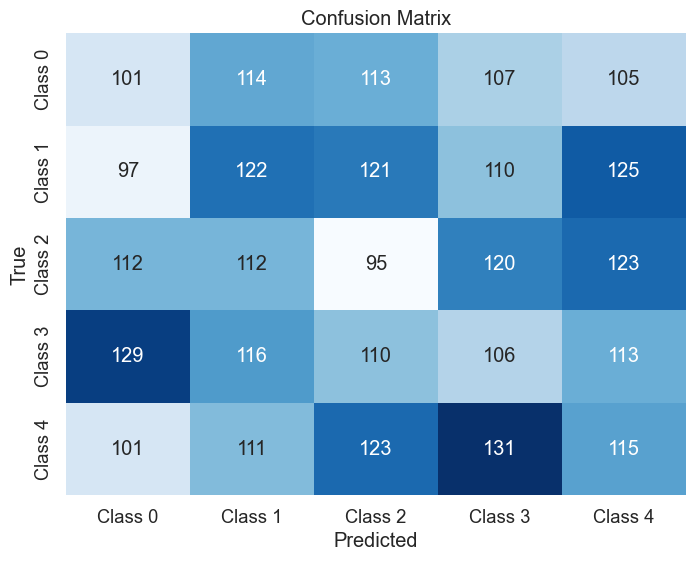

In [42]:
from sklearn.metrics import confusion_matrix

# Convert predicted probabilities to discrete class predictions
y_pred = np.argmax(y_pred_prob, axis=1)

# Compute confusion matrix
cmat = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:")
print(cmat)

# Print other metrics
print('TP - True Negative: {}'.format(cmat[0, 0]))
print('FP - False Positive: {}'.format(cmat[0, 1]))
print('FN - False Negative: {}'.format(cmat[1, 0]))
print('TP - True Positive: {}'.format(cmat[1, 1]))

# Compute and print accuracy rate
accuracy_rate = np.divide(np.sum([cmat[0, 0], cmat[1, 1]]), np.sum(cmat))
print('Accuracy Rate: {}'.format(accuracy_rate))

# Compute and print misclassification rate
misclassification_rate = np.divide(np.sum([cmat[0, 1], cmat[1, 0]]), np.sum(cmat))
print('Misclassification Rate: {}'.format(misclassification_rate))

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Assuming y_true and y_pred are available
conf_matrix = confusion_matrix(y_true, y_pred)

# Plotting the confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)  # Adjust font scale for better readability
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', cbar=False,
            xticklabels=['Class 0', 'Class 1', 'Class 2', 'Class 3', 'Class 4'], 
            yticklabels=['Class 0', 'Class 1', 'Class 2', 'Class 3', 'Class 4'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [43]:
#Calculate sensitivity, F1 score, and print classification report
y_pred = np.argmax(y_pred_prob, axis=1)
print("Classification Report:")
print(classification_report(y_true, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.19      0.19      0.19       540
           1       0.21      0.21      0.21       575
           2       0.17      0.17      0.17       562
           3       0.18      0.18      0.18       574
           4       0.20      0.20      0.20       581

    accuracy                           0.19      2832
   macro avg       0.19      0.19      0.19      2832
weighted avg       0.19      0.19      0.19      2832



In [44]:
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score

# Calculate accuracy
accuracy = accuracy_score(y_true, y_pred)

# Calculate sensitivity (true positive rate)
sensitivity = recall_score(y_true, y_pred, average='macro')  # or 'micro', 'weighted' depending on your needs

# Calculate F1 score
f1 = f1_score(y_true, y_pred, average='macro')  # or 'micro', 'weighted' depending on your needs

# Print classification report
print("Classification Report:")
print(classification_report(y_true, y_pred))

print("Accuracy:", accuracy)
print("Sensitivity (True Positive Rate):", sensitivity)
print("F1 Score:", f1)


Classification Report:
              precision    recall  f1-score   support

           0       0.19      0.19      0.19       540
           1       0.21      0.21      0.21       575
           2       0.17      0.17      0.17       562
           3       0.18      0.18      0.18       574
           4       0.20      0.20      0.20       581

    accuracy                           0.19      2832
   macro avg       0.19      0.19      0.19      2832
weighted avg       0.19      0.19      0.19      2832

Accuracy: 0.19032485875706215
Sensitivity (True Positive Rate): 0.1901707362119968
F1 Score: 0.1901707362119968


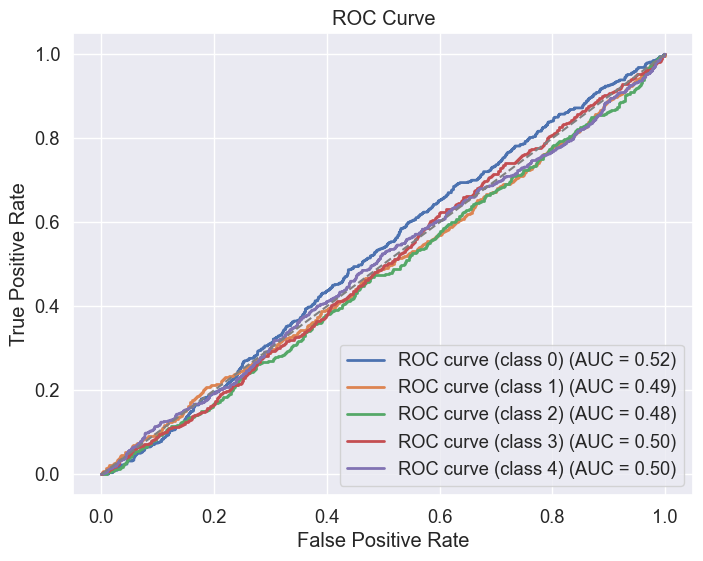

In [45]:
from sklearn.metrics import roc_curve, auc
import numpy as np

# Assuming y_true and y_pred are your true labels and predicted probabilities respectively
n_classes = len(np.unique(y_true))

# Initialize dictionaries to store fpr, tpr, and roc_auc for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

# Compute ROC curve and ROC area for each class
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_true == i, y_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve
plt.figure(figsize=(8, 6))
for i in range(len(np.unique(y_true))):
    plt.plot(fpr[i], tpr[i], lw=2, label='ROC curve (class {}) (AUC = {:.2f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

In [46]:
def calculate_sensitivity(y_true, y_pred):
    # Calculate True Positives (TP) and False Negatives (FN)
    TP = sum((y_true == 1) & (y_pred == 1))
    FN = sum((y_true == 1) & (y_pred == 0))
    
    # Calculate Sensitivity
    sensitivity = TP / (TP + FN)
    
    return sensitivity

sensitivity = calculate_sensitivity(y_true, y_pred)
print("Sensitivity:", sensitivity)

Sensitivity: 0.5570776255707762


In [47]:
import tensorflow as tf

# Load the model
model = tf.keras.models.load_model("DR_CNN.keras")

# Reset optimizer state
model.compile(optimizer=model.optimizer, loss=model.loss, metrics=model.metrics)
import tensorflow as tf
from keras.models import load_model

# Load the model without loading the optimizer's weights
model = load_model('DR_CNN.keras', compile=False)

# Compile the model with the desired optimizer configuration
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)  # Example optimizer configuration
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Optionally, you can print the model summary to verify the optimizer configuration
print(model.summary())

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 112, 112,  │        864 │ input_layer[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 112, 112,  │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 112, 112,  │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 112, 112,  │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 112, 112,  │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 112, 112,  │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 113, 113,  │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 56, 56,    │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │          0 │ block_1_depthwis… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, 56, 56,    │      2,304 │ block_1_depthwis

 Total params: 2,916,421 (11.13 MB)

 Trainable params: 2,882,309 (11.00 MB)

 Non-trainable params: 34,112 (133.25 KB)

None
